In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data 

last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [14]:
# Calculate the date 1 year ago from the last data point in the database

last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [15]:
# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date

percipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(percipitation)

prcp_df.set_index('date').head()

prcp_df.head(15)


,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


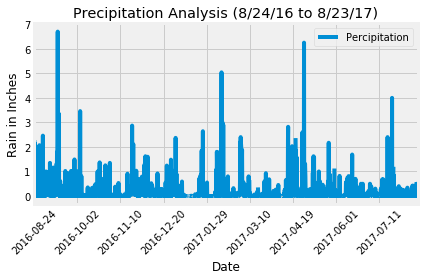

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (8/24/16 to 8/23/17)")
plt.legend(["Percipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [25]:
# Design a query to show how many stations are available in this dataset

stations = session.query(Measurement).group_by(Measurement.station).count()

print(stations)

9


In [33]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_activity = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()

most_active = station_activity[0][0]
print("Busiest station is", most_active,"with",station_activity[0][1],"observations.")

for station, count in station_activity:
    print("Station ",station," has",count, "observations")

Busiest station is USC00519281 with 2772 observations.
Station  USC00519281  has 2772 observations
Station  USC00519397  has 2724 observations
Station  USC00513117  has 2709 observations
Station  USC00519523  has 2669 observations
Station  USC00516128  has 2612 observations
Station  USC00514830  has 2202 observations
Station  USC00511918  has 1979 observations
Station  USC00517948  has 1372 observations
Station  USC00518838  has 511 observations


In [45]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

temps_519281 = session.query(Measurement.station, func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

print(temps_519281)

[('USC00519281', 85.0, 54.0, 71.66378066378067)]


In [48]:
# Choose the station with the highest number of temperature observations.

temp_yearly = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

temp_df=pd.DataFrame(temp_yearly)
temp_df.head(5)

,station,date,tobs
0,USC00519281,2016-08-24,77.0
1,USC00519281,2016-08-25,80.0
2,USC00519281,2016-08-26,80.0
3,USC00519281,2016-08-27,75.0
4,USC00519281,2016-08-28,73.0


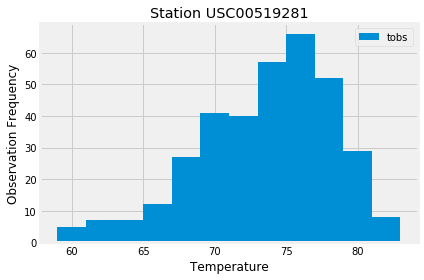

In [51]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_df.plot.hist(bins=12)
plt.ylabel("Observation Frequency")
plt.xlabel("Temperature")
plt.title("Station USC00519281")
plt.tight_layout()
plt.show()